# In-depth: manifold Learning
While PCA works well, it does not perform well when there are nonlinear relationships in the data

We can use manifold learning to address this.
- a class of unsupervised estimators which describe data as low-dimensional manifolds embedded in high-dimensional spaces
- we can transform the 2d object in 3d space
- manifold learning seeks to learn about the fundamental 2d nature

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Manifold learning: "HELLO"
- generate 2d data to define a manifold

In [2]:
def make_hello(N=1000, rseed=42):
    # make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(-0.20835420840544649,
 4.203971195560074,
 0.0065469735014421979,
 1.0131108713369323)

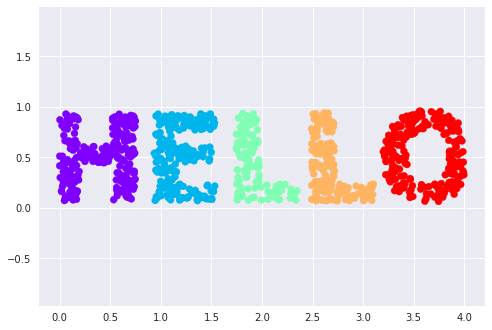

In [3]:
# Call the function and visualize the resulting data
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

The output is a 2d set of points that draws the word "HELLO"

## Multidimensional Scaling (MDS)